In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
data = load_breast_cancer()
X, y = data.data, data.target

In [3]:
# 전처리
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
class Perceptron(nn.Module):
    def __init__(self):
        super(Perceptron, self).__init__()
        self.fc = nn.Linear(X_train.shape[1], 1)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = self.fc(x)
        x = self.sigmoid(x)
        return x
    
model = Perceptron()
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [6]:
train_losses = []
test_accs = []

for epoch in range(100):
    running_loss = 0.0
    for i in range(X_train.shape[0]):
        inputs = torch.tensor(X_train[i], dtype=torch.float32)
        label = torch.tensor([y_train[i]], dtype=torch.float32)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, label)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    # 테스트 데이터 정확도 계산
    with torch.no_grad():
        correct = 0
        total = 0
        for i in range(X_test.shape[0]):
            inputs = torch.tensor(X_test[i], dtype=torch.float32)
            label = y_test[i]
            
            outputs = model(inputs)
            predicted = torch.round(outputs)
            total += 1
            correct += (predicted == label).sum().item()
            
        accuracy = correct / total * 100
        train_losses.append(running_loss)
        test_accs.append(accuracy)
        
        print('Epoch [%d], Loss: %.4f, Test Accuracy: %.2f%%' % (epoch + 1, running_loss, accuracy))

Epoch [1], Loss: 248.3782, Test Accuracy: 97.37%
Epoch [2], Loss: 232.7372, Test Accuracy: 98.25%
Epoch [3], Loss: 228.1860, Test Accuracy: 98.25%
Epoch [4], Loss: 225.6961, Test Accuracy: 98.25%
Epoch [5], Loss: 224.0543, Test Accuracy: 98.25%
Epoch [6], Loss: 222.8604, Test Accuracy: 98.25%
Epoch [7], Loss: 221.9383, Test Accuracy: 98.25%
Epoch [8], Loss: 221.1967, Test Accuracy: 98.25%
Epoch [9], Loss: 220.5827, Test Accuracy: 98.25%
Epoch [10], Loss: 220.0629, Test Accuracy: 98.25%
Epoch [11], Loss: 219.6153, Test Accuracy: 98.25%
Epoch [12], Loss: 219.2245, Test Accuracy: 98.25%
Epoch [13], Loss: 218.8794, Test Accuracy: 98.25%
Epoch [14], Loss: 218.5716, Test Accuracy: 98.25%
Epoch [15], Loss: 218.2949, Test Accuracy: 98.25%
Epoch [16], Loss: 218.0443, Test Accuracy: 98.25%
Epoch [17], Loss: 217.8159, Test Accuracy: 98.25%
Epoch [18], Loss: 217.6067, Test Accuracy: 98.25%
Epoch [19], Loss: 217.4140, Test Accuracy: 98.25%
Epoch [20], Loss: 217.2359, Test Accuracy: 98.25%
Epoch [21

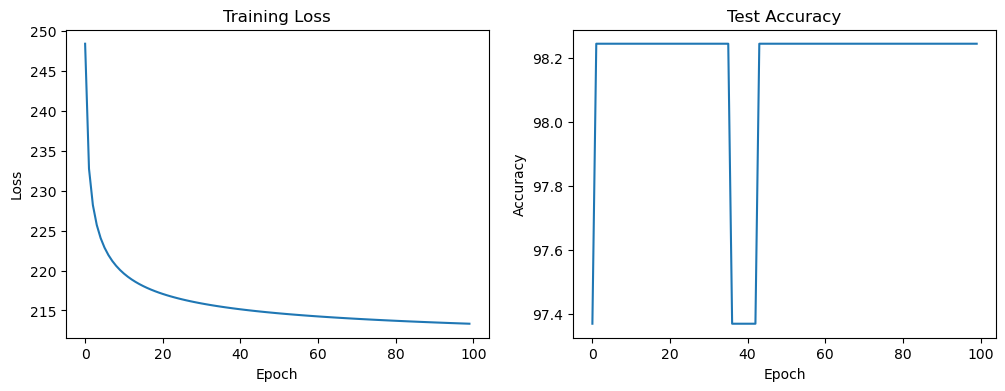

In [7]:
# 손실 및 정확도 시각화
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(train_losses)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.subplot(1, 2, 2)
plt.plot(test_accs)
plt.title("Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()